<a href="https://colab.research.google.com/github/Phantasm320/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [0]:
##### Your Code Here #####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv")
print(df.columns, "\n")
df.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object') 



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Drop columns that I don't care about

df = df.drop(['id','date','zipcode','lat','long','yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503


In [0]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

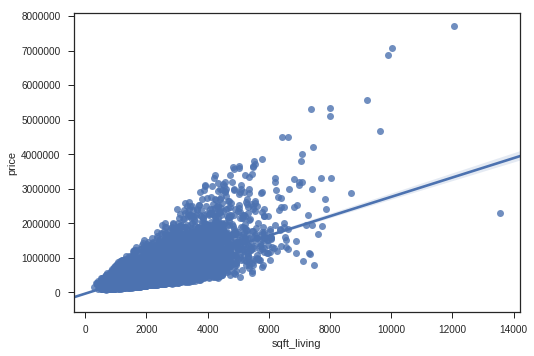

In [0]:
sns.regplot(df['sqft_living'], df['price'])

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

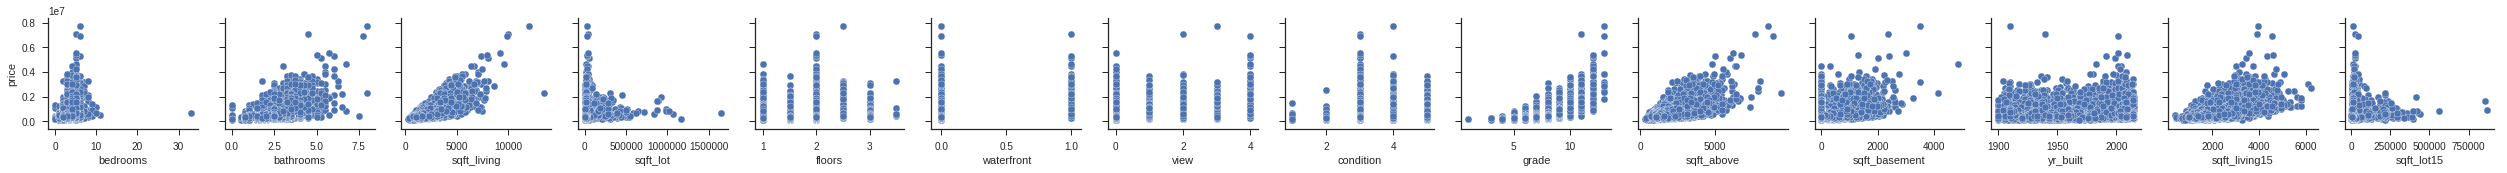

In [0]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('price')

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['price'], x_vars=x_columns)

In [0]:
##### Your Code Here #####
X = df[['bedrooms', 'sqft_living', 'sqft_above', 'grade']]
y = df['price']

# Use Statsmodels to run a regression

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     6578.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:44:39   Log-Likelihood:            -2.9900e+05
No. Observations:               21613   AIC:                         5.980e+05
Df Residuals:                   21608   BIC:                         5.980e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.197e+05    1.5e+04    -34.629      

In [0]:
-80.1541 / 4.387

-18.270822885798953

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

__All P-values are zero, meaning all variables in our dataframe are significant__
__All standard error values are positive, probably meaning that our independent variables are indeed significant in our prediction (y_hat)__

Reference: https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm#ptse



## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [0]:
# # Lets remove outliers 

print(df.shape)

# removing data more than 3 standard deviations from the mean - a method to remove outliers
# then updating df
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

print(df.shape)

(21613, 15)
(19628, 15)


In [0]:
# Re-run regression without outliers.

X = df[['bedrooms', 'sqft_living', 'sqft_above', 'grade']]
y = df['price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


# Notice under P>|t| sqft_lot still not statistically significant at 0.438 
# (which does nto make sense)

# Compare t statistics of this report to the one above
# Lookout for big jumps from positive to negative

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     4408.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:17:44   Log-Likelihood:            -2.6427e+05
No. Observations:               19628   AIC:                         5.285e+05
Df Residuals:                   19623   BIC:                         5.286e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.93e+05   1.16e+04    -34.019      

__Biggest changes are seen in 'grade' and 'bedroom' variables. Yet P-values still remain significant.__

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [0]:
##### Your Code Here #####
df['ln_price'] = np.log(df['price'])

# Log-Linear Regression
X = df[['bedrooms', 'sqft_living', 'sqft_above', 'grade']] 

y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

# LOOK: A lot of statistic changed because price is now normalized!!!
#  Jarque-Bera (JB): 82.572 <<-- A lot more NORMAL!
# Skew:  -0.137
#Kurtosis:3.160

# Also our coefficient interpretations CHANGED TO PERCENTAGE!
# 1 unit increase in price change would change grade by .2088 in avg

# sqft_above is odd -- must be due to colinearity

# --->>>> As we improve our data to accuracy and precision we will get better coefficients

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     4374.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:34:39   Log-Likelihood:                -6476.0
No. Observations:               19628   AIC:                         1.296e+04
Df Residuals:                   19623   BIC:                         1.300e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.2035      0.023    490.614      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


__Our Jarque-Bera test is now a lot closer to zero (12.744) - meaning our distribution is a lot more normal. This is confirmed by our Kurtosis being pretty much 3 (2.894) & our 'Skew' at almost zero (0.033)!__

__This is all accomplished by our having removed outliers and creating a new _log(y)_ to better fit the data!__

Reference: https://www.statisticshowto.datasciencecentral.com/jarque-bera-test/

The Jarque-Bera Test,a type of Lagrange multiplier test, is a test for normality. Normality is one of the assumptions for many statistical tests, like the t test or F test; the Jarque-Bera test is usually run before one of these tests to confirm normality. 

A normal distribution has a skew of zero (i.e. it’s perfectly symmetrical around the mean) and a kurtosis of three; kurtosis tells you how much data is in the tails and gives you an idea about how “peaked” the distribution is. It’s not necessary to know the mean or the standard deviation for the data in order to run the test.

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [0]:
##### Your Code Here #####
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'bedrooms', 'sqft_living', 'sqft_above', 'grade'], dtype='object') 


[90.34238250701654, 1.6374985136133624, 5.057414032090982, 4.091044578439856, 2.232922179381246]


__Not one of our variables seem to have a high enough level of collinearity to be concerned. Although two of our variables ('sqft_living ' & 'sqft_above' have a VIF of around 5) VIF's are somewhat high, these should not be a cause for them to be removed. None of them comes close to 10.__

Reference: https://www.statisticshowto.datasciencecentral.com/variance-inflation-factor/

Variance inflation factors range from 1 upwards. The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient. For example, a VIF of 1.9 tells you that the variance of a particular coefficient is 90% bigger than what you would expect if there was no multicollinearity — if there was no correlation with other predictors.
A rule of thumb for interpreting the variance inflation factor:

1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [0]:
##### Your Code Here #####
X.corr()

,const,bedrooms,sqft_living,sqft_above,grade
const,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.000000,0.608228,0.485218,0.333969
sqft_living,NaN,0.608228,1.000000,0.856115,0.706916
sqft_above,NaN,0.485218,0.856115,1.000000,0.710706
grade,NaN,0.333969,0.706916,0.710706,1.000000


## 2.3 If you have varaibles with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

__Removing variables with higher VIF did not improve our standard errors... actually increased the rate of our Jarque-Bera and Skew, and most importantly our Kurtosis was reduced (not as close to 3). So the removal of higher VIFs inversely affected our results.__

In [0]:
##### Your Code Here #####
##### Your Code Here #####
df['ln_price'] = np.log(df['price'])

# REMOVING 'sqft_living' - Log-Linear Regression
X_changed = df[['bedrooms', 'sqft_living', 'grade']] 

y = df['ln_price']

# This is like using np.ones to add a vector of ones
X_changed = sm.add_constant(X_changed)

model = sm.OLS(y, X_changed).fit()
predictions = model.predict(X_changed) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     5572.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:34:27   Log-Likelihood:                -6684.7
No. Observations:               19628   AIC:                         1.338e+04
Df Residuals:                   19624   BIC:                         1.341e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.2969      0.023    499.467      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

__Standard errors remain small__

In [0]:
# Lets run our regression again using Robust Standard Errors
# cov_type='HC3' parameter to .fit() function

# "HC3" cause it to use robust standard errors to account for and correct Heteroskedasticity
# robust standard errors is the correction for Heteroskedasticity!
# NOTE: now "t score" in report will change to "z score"

model = sm.OLS(y, X).fit(cov_type='HC3') 
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     4529.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:34:48   Log-Likelihood:                -6476.0
No. Observations:               19628   AIC:                         1.296e+04
Df Residuals:                   19623   BIC:                         1.300e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.2035      0.023    483.082      

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

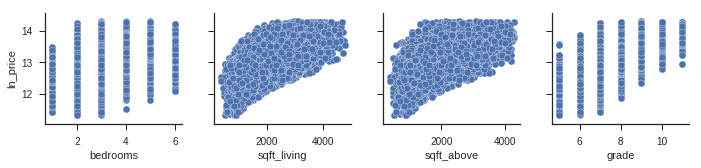

In [0]:
##### Your Code Here #####
sns.pairplot(data=df, x_vars=['bedrooms', 'sqft_living', 'sqft_above', 'grade'], y_vars=['ln_price'])

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

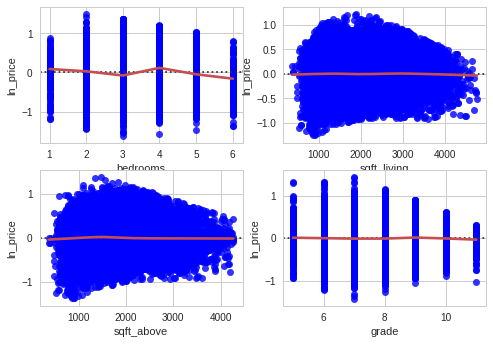

In [0]:
##### Your Code Here #####
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.residplot(X['bedrooms'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(X['sqft_living'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(X['sqft_above'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(X['grade'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
X = df[['bedrooms', 'sqft_living', 'sqft_above', 'grade', 'bedrooms_squared']] 

y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     3681.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        22:50:20   Log-Likelihood:                -6437.3
No. Observations:               19628   AIC:                         1.289e+04
Df Residuals:                   19622   BIC:                         1.293e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.4034      0.035  

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


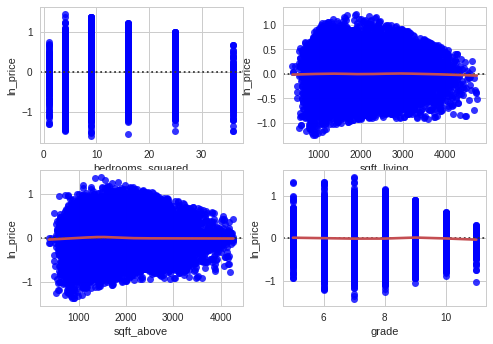

In [0]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.residplot(X['bedrooms_squared'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(X['sqft_living'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(X['sqft_above'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(X['grade'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


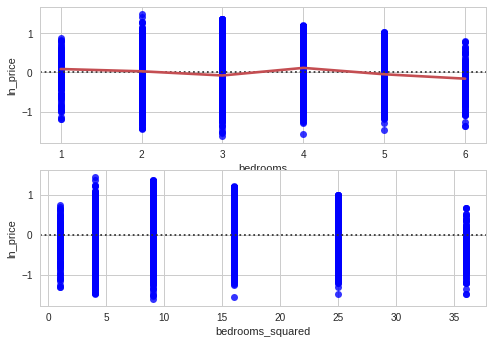

In [0]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2,1)
sns.residplot(X['bedrooms'], y, lowess=True, color="r", ax=axs[0], scatter_kws={'color':'blue'})
sns.residplot(X['bedrooms_squared'], y, lowess=True, color="r", ax=axs[1], scatter_kws={'color':'blue'})